C:\Users\ASQ\AppData\Local\Temp\ipykernel_28420\3149792525.py:37: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig, ax = plt.subplots(num=1, figsize=(14, 8))


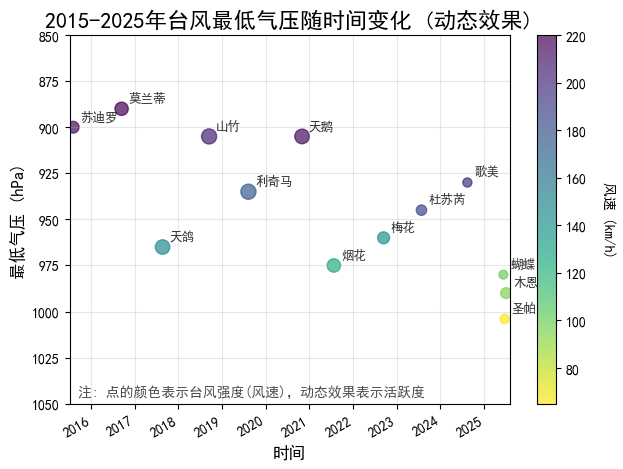

In [1]:
# 导入必要的库
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.animation as animation
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 创建示例数据
typhoon_data = [
    {'name': '苏迪罗', 'date': '2015-08-05', 'pressure': 900, 'wind_speed': 215, 'year': 2015, 'month': 8},
    {'name': '莫兰蒂', 'date': '2016-09-13', 'pressure': 890, 'wind_speed': 220, 'year': 2016, 'month': 9},
    {'name': '天鸽', 'date': '2017-08-22', 'pressure': 965, 'wind_speed': 145, 'year': 2017, 'month': 8},
    {'name': '山竹', 'date': '2018-09-15', 'pressure': 905, 'wind_speed': 205, 'year': 2018, 'month': 9},
    {'name': '利奇马', 'date': '2019-08-10', 'pressure': 935, 'wind_speed': 175, 'year': 2019, 'month': 8},
    {'name': '天鹅', 'date': '2020-11-01', 'pressure': 905, 'wind_speed': 215, 'year': 2020, 'month': 11},
    {'name': '烟花', 'date': '2021-07-25', 'pressure': 975, 'wind_speed': 125, 'year': 2021, 'month': 7},
    {'name': '梅花', 'date': '2022-09-14', 'pressure': 960, 'wind_speed': 140, 'year': 2022, 'month': 9},
    {'name': '杜苏芮', 'date': '2023-07-28', 'pressure': 945, 'wind_speed': 185, 'year': 2023, 'month': 7},
    {'name': '歌美', 'date': '2024-08-15', 'pressure': 930, 'wind_speed': 198, 'year': 2024, 'month': 8},
    {'name': '蝴蝶', 'date': '2025-06-12', 'pressure': 980, 'wind_speed': 100, 'year': 2025, 'month': 6},
    {'name': '圣帕', 'date': '2025-06-24', 'pressure': 1004, 'wind_speed': 65, 'year': 2025, 'month': 6},
    {'name': '木恩', 'date': '2025-07-05', 'pressure': 990, 'wind_speed': 95, 'year': 2025, 'month': 7}
 ]

# 转换为DataFrame
df = pd.DataFrame(typhoon_data)
df['date'] = pd.to_datetime(df['date'])

# 创建图表，指定figure1
plt.figure(1)
fig, ax = plt.subplots(num=1, figsize=(14, 8))

# 设置颜色映射
norm = Normalize(vmin=df['wind_speed'].min(), vmax=df['wind_speed'].max())
cmap = plt.get_cmap('viridis_r')

# 初始化散点图
scatter = ax.scatter(df['date'], df['pressure'], 
                    c=df['wind_speed'], 
                    s=100,  # 初始大小
                    alpha=0.7, 
                    cmap=cmap,
                    norm=norm)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('风速 (km/h)', rotation=270, labelpad=20)

# 为每个点添加台风名称标签
annotations = []
for i, row in df.iterrows():
    ann = ax.annotate(row['name'], 
                     (row['date'], row['pressure']),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=9, alpha=0.8)
    annotations.append(ann)

# 设置标题和轴标签
ax.set_title('2015-2025年台风最低气压随时间变化 (动态效果)', fontsize=16, fontweight='bold')
ax.set_xlabel('时间', fontsize=12)
ax.set_xlim(df['date'].min() - pd.Timedelta(days=30), 
           df['date'].max() + pd.Timedelta(days=30))
ax.set_ylabel('最低气压 (hPa)', fontsize=12)
ax.set_ylim(1050, 850)  # 使低压值在顶部

# 格式化x轴日期显示
fig.autofmt_xdate()

# 添加网格
ax.grid(True, alpha=0.3)

# 添加说明文本
ax.text(0.02, 0.02, '注: 点的颜色表示台风强度(风速)，动态效果表示活跃度', 
        transform=ax.transAxes, fontsize=10, alpha=0.7)

# 动画函数 - 创建呼吸效果
def update(frame):
    # 计算每个点的缩放因子 (正弦波)
    scale_factors = 0.8 + 0.4 * np.sin(2 * np.pi * frame / 30 + np.arange(len(df)) * 0.5)
    
    # 更新点的大小
    new_sizes = [100 * factor for factor in scale_factors]
    scatter.set_sizes(new_sizes)
    
    # 更新点的透明度 (与大小同步变化)
    facecolors = scatter.get_facecolors()
    new_alphas = [0.4 + 0.6 * factor / 1.2 for factor in scale_factors]
    if len(facecolors) == len(new_alphas):
        for fc, alpha in zip(facecolors, new_alphas):
            fc[3] = alpha
        scatter.set_facecolors(facecolors)
    
    return scatter,

# 创建动画，绑定到figure1
ani = animation.FuncAnimation(fig, update, frames=60, interval=100, blit=True)

plt.tight_layout()

# 在Jupyter Notebook中显示动画
from IPython.display import HTML
HTML(ani.to_jshtml())

# 如果要保存为GIF文件，取消下面的注释
# ani.save('typhoon_animation.gif', writer='pillow', fps=15)

plt.show()